In [15]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.graph_objects as go

In [2]:
df= pd.read_csv("Datasets/top_10_stock_data.csv")

In [3]:
df

,Date,Ticker,Open,High,Low,Close,Adj Close,Volume
0,2015-01-02,AAPL,27.847500,27.860001,26.837500,27.332500,24.373959,212818400
1,2015-01-05,AAPL,27.072500,27.162500,26.352501,26.562500,23.687313,257142000
2,2015-01-06,AAPL,26.635000,26.857500,26.157499,26.565001,23.689535,263188400
3,2015-01-07,AAPL,26.799999,27.049999,26.674999,26.937500,24.021711,160423600
4,2015-01-08,AAPL,27.307501,28.037500,27.174999,27.972500,24.944679,237458000
...,...,...,...,...,...,...,...,...
25481,2024-08-23,LLY,955.440002,960.500000,943.109985,952.739990,952.739990,2063300
25482,2024-08-26,LLY,949.200012,955.000000,942.770020,950.530029,950.530029,2166000
25483,2024-08-27,LLY,952.500000,972.479980,949.950012,954.479980,954.479980,2912900
25484,2024-08-28,LLY,954.150024,958.340027,943.260010,948.940002,948.940002,1701800


In [29]:
df['Date'] = pd.to_datetime(df['Date'])


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25486 entries, 0 to 25485
Data columns (total 8 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Date       25486 non-null  object 
 1   Ticker     25486 non-null  object 
 2   Open       25486 non-null  float64
 3   High       25486 non-null  float64
 4   Low        25486 non-null  float64
 5   Close      25486 non-null  float64
 6   Adj Close  25486 non-null  float64
 7   Volume     25486 non-null  int64  
dtypes: float64(5), int64(1), object(2)
memory usage: 1.6+ MB


In [7]:
df.isnull().sum()

Date         0
Ticker       0
Open         0
High         0
Low          0
Close        0
Adj Close    0
Volume       0
dtype: int64

In [8]:
df.describe()

,Open,High,Low,Close,Adj Close,Volume
count,25486.000000,25486.000000,25486.000000,25486.000000,25486.000000,2.548600e+04
mean,122.880757,124.155843,121.584466,122.910798,120.838984,7.770094e+07
std,115.447694,116.647929,114.176053,115.447702,115.470334,1.571748e+08
min,0.481250,0.487500,0.473500,0.478500,0.459453,0.000000e+00
25%,39.992501,40.222501,39.664376,39.950251,38.005300,7.839552e+06
50%,91.272247,92.334751,90.328251,91.234249,90.031422,2.504400e+07
75%,165.699997,167.208370,164.027500,165.617496,164.885014,6.082800e+07
max,956.200012,972.530029,949.950012,954.479980,954.479980,3.692928e+09


In [11]:
df.columns

Index(['Date', 'Ticker', 'Open', 'High', 'Low', 'Close', 'Adj Close',
       'Volume'],
      dtype='object')

 # Stock Prices Over Time

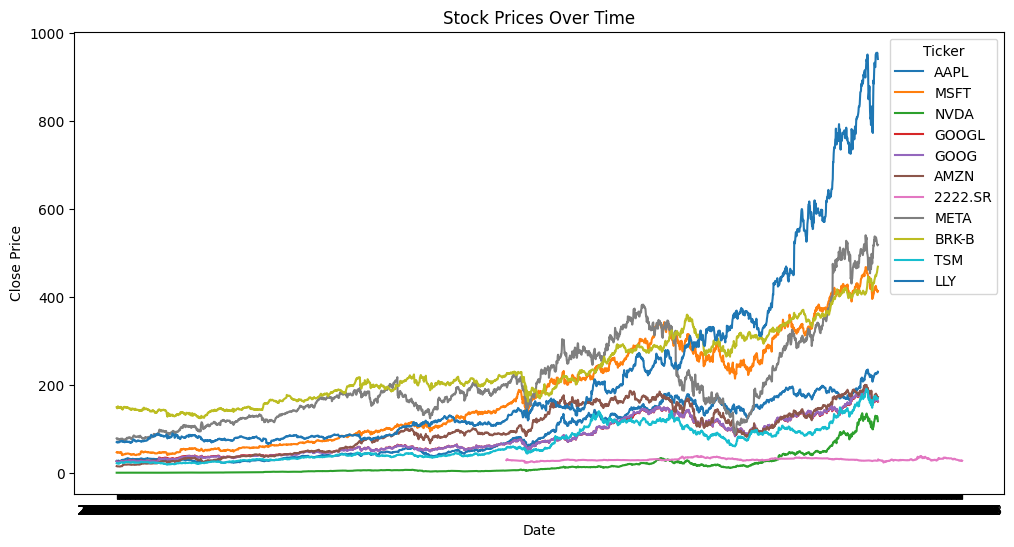

In [14]:
plt.figure(figsize=(12, 6))
for ticker in df['Ticker'].unique():
    sns.lineplot(x='Date', y='Close', data=df[df['Ticker'] == ticker], label=ticker)
plt.title('Stock Prices Over Time')
plt.xlabel('Date')
plt.ylabel('Close Price')
plt.legend(title='Ticker')
plt.show()

*This line plot will display each stock's closing prices over time, making it easy to observe trends and patterns.*

# Candlestick Plot for a Specific Stock 

In [16]:
aapl_data = df[df['Ticker'] == 'AAPL']
fig = go.Figure(data=[go.Candlestick(x=aapl_data['Date'],
                open=aapl_data['Open'],
                high=aapl_data['High'],
                low=aapl_data['Low'],
                close=aapl_data['Close'])])
fig.update_layout(title='AAPL Candlestick Chart',
                  xaxis_title='Date',
                  yaxis_title='Price',
                  xaxis_rangeslider_visible=False)
fig.show()

*The candlestick chart will show the open, high, low, and close prices for AAPL, offering a detailed view of the stock's price movements.*

# Volume of Trades Over Time

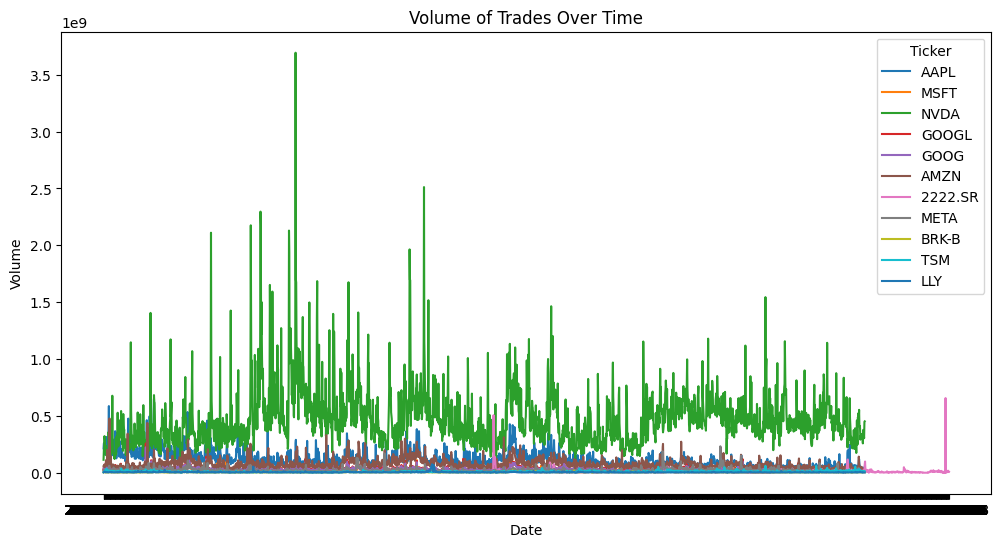

In [17]:
plt.figure(figsize=(12, 6))
for ticker in df['Ticker'].unique():
    sns.lineplot(x='Date', y='Volume', data=df[df['Ticker'] == ticker], label=ticker)
plt.title('Volume of Trades Over Time')
plt.xlabel('Date')
plt.ylabel('Volume')
plt.legend(title='Ticker')
plt.show()

*This line plot will visualize trading volume, highlighting days with unusually high or low trading activity.*

# Close Prices

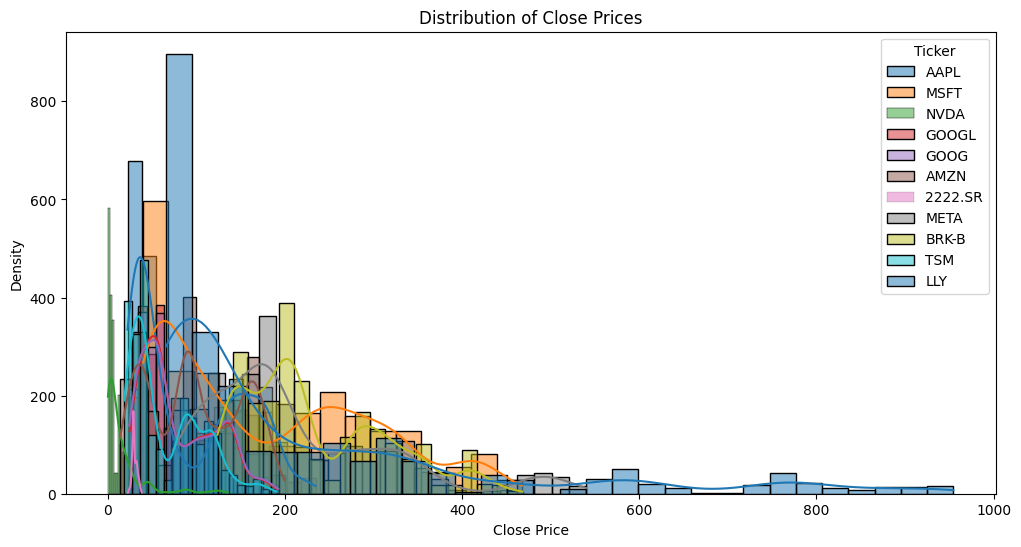

In [18]:
plt.figure(figsize=(12, 6))
for ticker in df['Ticker'].unique():
    sns.histplot(data=df[df['Ticker'] == ticker], x='Close', kde=True, label=ticker)
plt.title('Distribution of Close Prices')
plt.xlabel('Close Price')
plt.ylabel('Density')
plt.legend(title='Ticker')
plt.show()

*The distribution plot (with KDE) will reveal the frequency and distribution of closing prices.*

# Close Prices by Stock

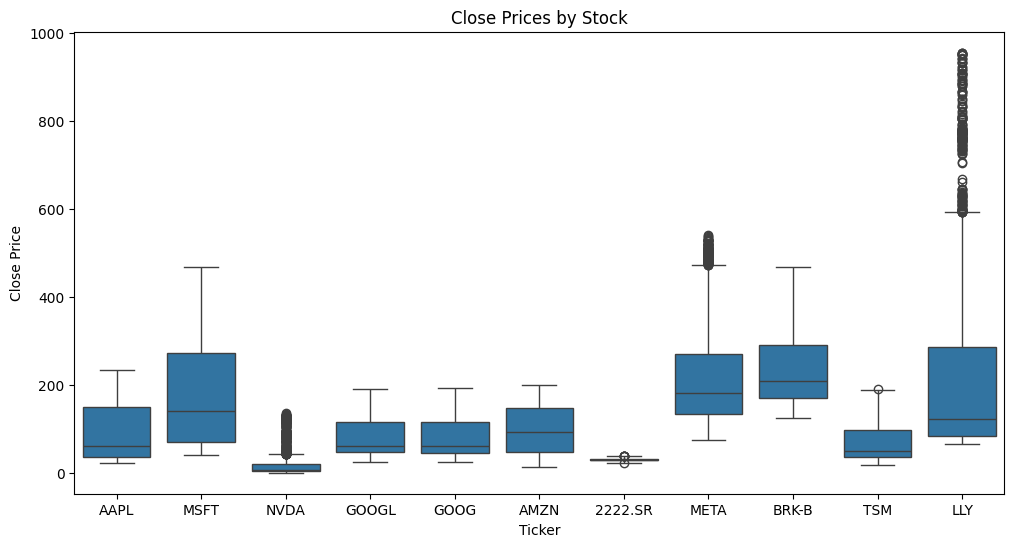

In [19]:
plt.figure(figsize=(12, 6))
sns.boxplot(x='Ticker', y='Close', data=df)
plt.title('Close Prices by Stock')
plt.xlabel('Ticker')
plt.ylabel('Close Price')
plt.show()


*The box plot will highlight the median, quartiles, and potential outliers in the closing prices of different stocks.*

# Correlation Heatmap of Price Features

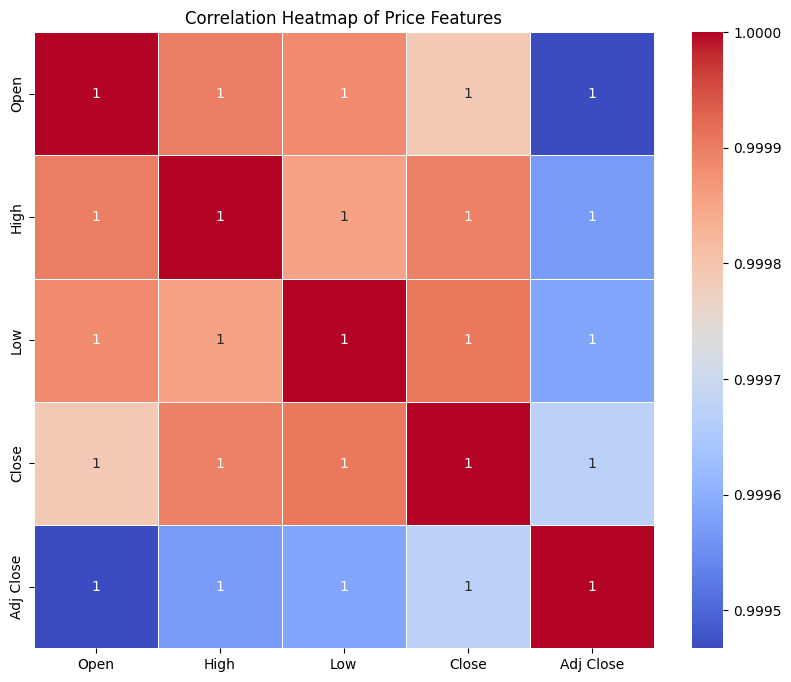

In [20]:
price_data = df[['Open', 'High', 'Low', 'Close', 'Adj Close']]
plt.figure(figsize=(10, 8))
sns.heatmap(price_data.corr(), annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Heatmap of Price Features')
plt.show()


*The heatmap will show how closely related the different price metrics are, which is useful for understanding price dynamics.*

# Pair Plot of Price Features for AAPL

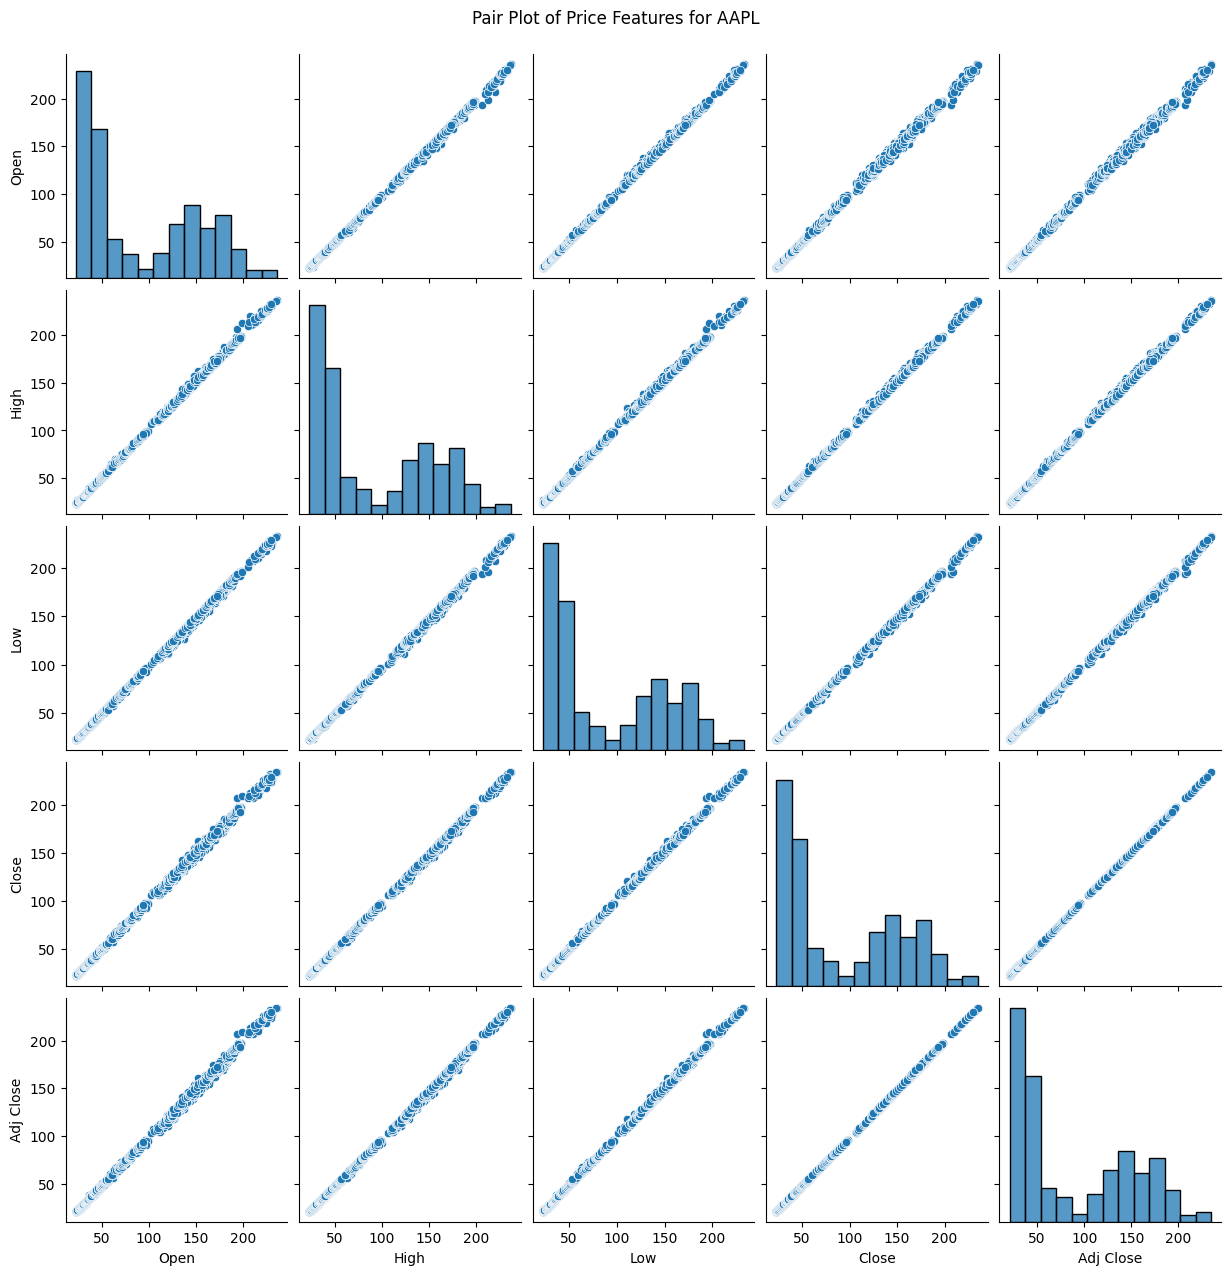

In [21]:
sns.pairplot(df[df['Ticker'] == 'AAPL'][['Open', 'High', 'Low', 'Close', 'Adj Close']])
plt.suptitle('Pair Plot of Price Features for AAPL', y=1.02)
plt.show()


*The pair plot will allow us to see relationships between pairs of price features, along with their distributions.*

 # 50 Day Moving Average for AAPL

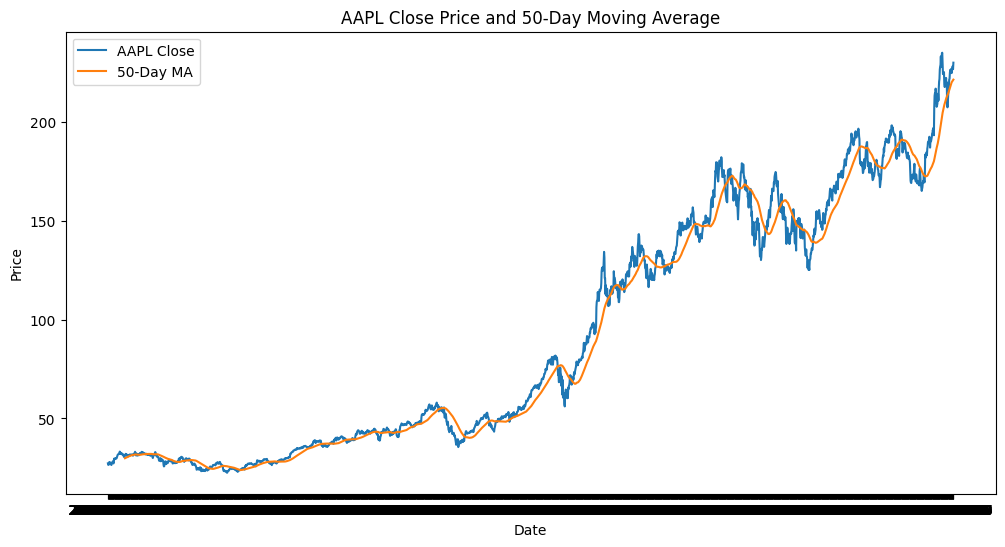

In [23]:
aapl_data = aapl_data.copy()
aapl_data['50_MA'] = aapl_data['Close'].rolling(window=50).mean()
plt.figure(figsize=(12, 6))
sns.lineplot(x='Date', y='Close', data=aapl_data, label='AAPL Close')
sns.lineplot(x='Date', y='50_MA', data=aapl_data, label='50-Day MA')
plt.title('AAPL Close Price and 50-Day Moving Average')
plt.xlabel('Date')
plt.ylabel('Price')
plt.legend()
plt.show()


*The line plot will compare AAPL's closing price against its 50-day moving average, illustrating longer-term trends.*

#  High vs. Low Prices

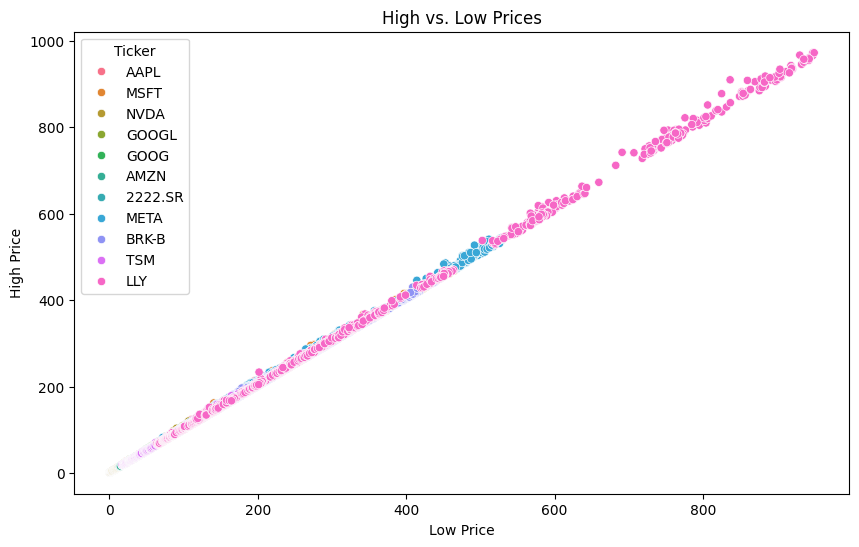

In [25]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Low', y='High', hue='Ticker', data=df)
plt.title('High vs. Low Prices')
plt.xlabel('Low Price')
plt.ylabel('High Price')
plt.legend(title='Ticker')
plt.show()


*The scatter plot will visualize the relationship between the daily high and low prices, showing how these fluctuate.*

# Volume Distribution by Stock

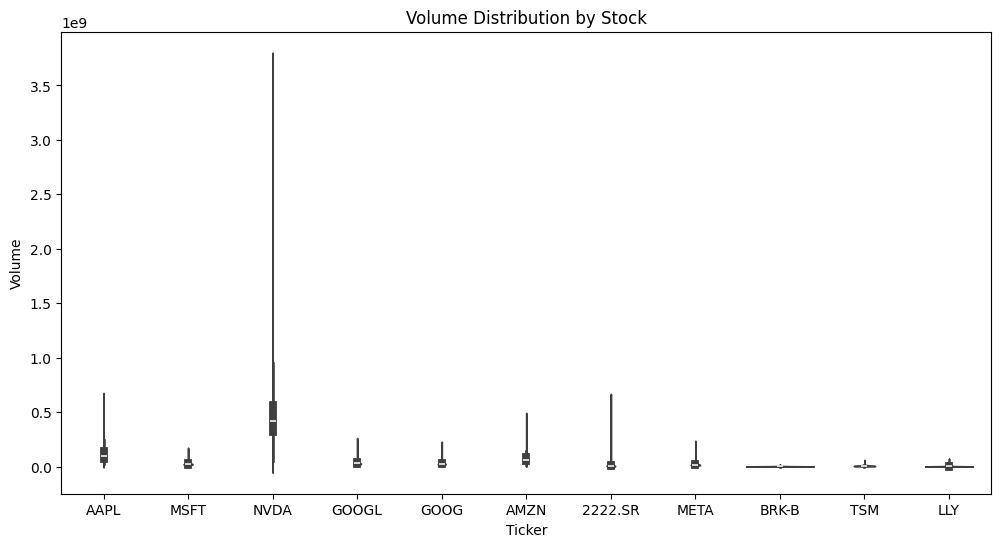

In [26]:
plt.figure(figsize=(12, 6))
sns.violinplot(x='Ticker', y='Volume', data=df)
plt.title('Volume Distribution by Stock')
plt.xlabel('Ticker')
plt.ylabel('Volume')
plt.show()


*The violin plot will provide a more detailed view of the distribution of trading volumes across stocks.*

#  Close Price Over Time for Top 3 Stocks by Volume

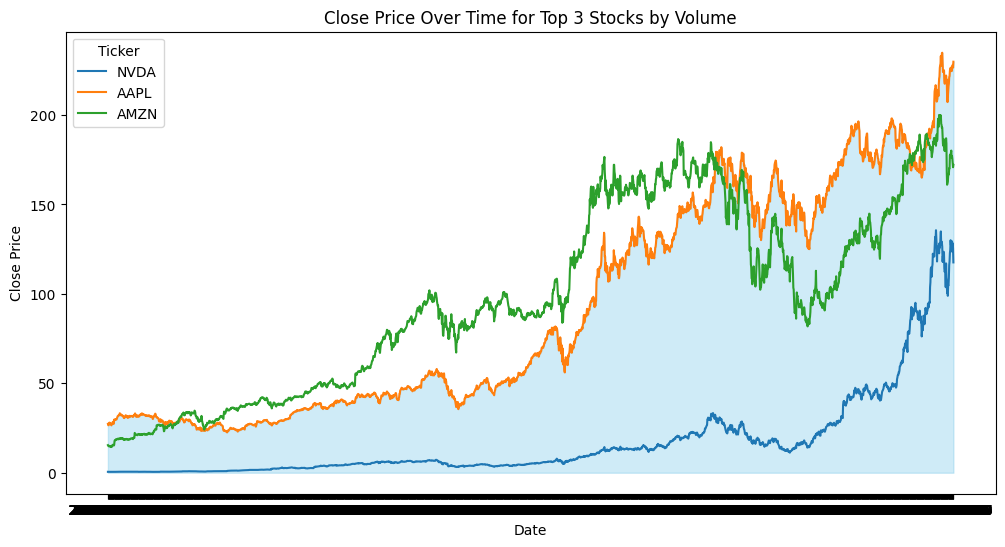

In [27]:
top_3_stocks = df.groupby('Ticker')['Volume'].sum().nlargest(3).index
plt.figure(figsize=(12, 6))
for ticker in top_3_stocks:
    sns.lineplot(x='Date', y='Close', data=df[df['Ticker'] == ticker], label=ticker)
plt.fill_between(aapl_data['Date'], aapl_data['Close'], color="skyblue", alpha=0.4)
plt.title('Close Price Over Time for Top 3 Stocks by Volume')
plt.xlabel('Date')
plt.ylabel('Close Price')
plt.legend(title='Ticker')
plt.show()


*The area plot will highlight the price trends of the most traded stocks.*

# Average Monthly Returns

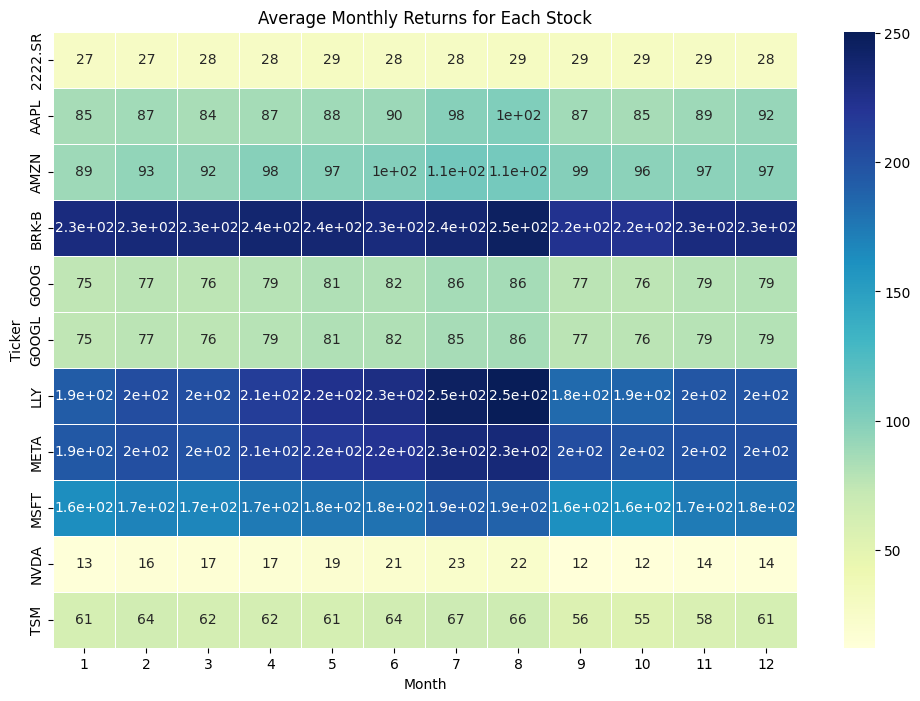

In [30]:
df['Month'] = df['Date'].dt.month
monthly_returns = df.groupby(['Ticker', 'Month'])['Adj Close'].mean().unstack()
plt.figure(figsize=(12, 8))
sns.heatmap(monthly_returns, annot=True, cmap='YlGnBu', linewidths=0.5)
plt.title('Average Monthly Returns for Each Stock')
plt.xlabel('Month')
plt.ylabel('Ticker')
plt.show()


*This heatmap will show how each stock performs on average in different months, highlighting seasonality effects.*

### # Conclusion

##### These visualizations showcase a wide range of analysis techniques using Python's plotting libraries. Each graph provides different insights into the stock data, from basic price trends to more advanced analysis like moving averages and correlation.